In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import quantile_transform as qt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
file=data=pd.read_csv("../../data/economic_score_data.csv").dropna()

In [7]:
file.describe()

,Unnamed: 0,FIPS,Risk of Severe Economic Harm,% Uninsured,% Children in Poverty,Income Ratio,% Single-Parent Households,% Severe Housing Cost Burden,% Severe Housing Problems,% Enrolled in Free or Reduced Lunch,% Unemployed,High School Graduation Rate
count,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000
mean,1474.500000,30323.082373,47.384478,13.438213,21.104881,4.523428,32.777154,11.418159,13.949922,52.128256,4.146007,86.745468
std,851.735972,15255.670827,17.147861,6.199959,8.934816,0.757717,10.302808,3.557712,4.342015,20.963188,1.445289,14.531952
min,0.000000,1001.000000,4.338983,2.682596,2.500000,0.000000,5.821206,0.000000,3.220339,0.000000,1.302083,0.000000
25%,737.250000,18143.500000,34.244871,8.411309,14.500000,4.019502,25.988703,8.986190,11.196973,39.821782,3.163590,84.515810
50%,1474.500000,29112.000000,47.870205,12.350267,20.100000,4.413503,31.965245,10.959695,13.440176,51.849733,3.904818,89.581080
75%,2211.750000,45072.500000,60.061552,17.262798,26.400000,4.884385,37.943142,13.368309,15.983209,63.632645,4.836224,93.434003
max,2949.000000,56045.000000,87.000892,42.397495,68.300000,11.970639,87.203791,31.661797,60.263447,100.000000,18.091619,100.000000


In [3]:
data=file[file.columns[4:]]

In [14]:
data

,Risk of Severe Economic Harm,% Uninsured,% Children in Poverty,Income Ratio,% Single-Parent Households,% Severe Housing Cost Burden,% Severe Housing Problems,% Enrolled in Free or Reduced Lunch,% Unemployed,High School Graduation Rate
0,48.443354,11.148989,19.3,5.234597,26.242679,13.403481,14.663462,43.408673,3.629079,90.000000
1,40.330062,14.348525,13.9,4.417767,24.139601,11.725808,13.566201,48.486565,3.615382,86.361577
2,75.368421,16.085834,43.9,5.681410,56.603426,14.059546,14.583333,63.292302,5.171384,81.410256
3,48.314005,13.000000,27.8,4.368581,28.689236,9.886874,10.496454,61.562116,3.971828,83.763838
4,38.792150,17.082342,18.0,4.430262,28.561828,8.462257,10.548012,52.906287,3.511157,93.468795
5,79.388046,15.240964,68.3,7.410196,74.789916,18.501529,18.143460,75.786594,4.690117,70.247934
6,70.801070,14.505765,36.3,5.423596,52.712836,11.545956,13.159609,79.157138,4.790218,81.589958
7,65.924175,15.388687,26.5,5.023896,40.191945,11.722432,13.734191,58.837593,4.652832,92.368046
8,67.535236,15.226317,30.7,4.744932,46.555444,12.381028,15.956679,71.121352,3.908091,86.238532
9,48.105263,13.940333,24.7,4.708465,23.778749,9.945696,13.000000,61.606244,3.570814,94.904459


In [15]:
data.columns

Index(['Risk of Severe Economic Harm', '% Uninsured', '% Children in Poverty',
       'Income Ratio', '% Single-Parent Households',
       '% Severe Housing Cost Burden', '% Severe Housing Problems',
       '% Enrolled in Free or Reduced Lunch', '% Unemployed',
       'High School Graduation Rate'],
      dtype='object')

In [4]:
X_norm1=qt(data, n_quantiles=5, random_state=13, copy=False)



Cluster 2 Inertia 1100.9417288198256
Cluster 3 Inertia 966.7583527264131
Cluster 4 Inertia 852.6137539474338
Cluster 5 Inertia 794.1897767163855
Cluster 6 Inertia 748.6280550916067
Cluster 7 Inertia 710.0230384437231


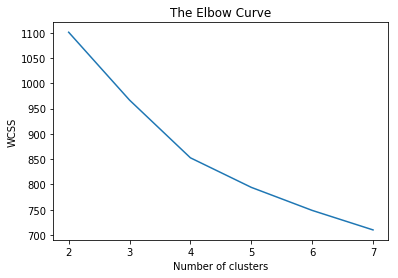

In [17]:
wcss = []  #Within-Cluster-Sum-of-Squares
end=8
for i in range(2,end):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_norm1)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,end),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

No. Clusters: 2, Silhouette Score: 0.157, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.152, Change from Previous Cluster: -0.005
No. Clusters: 4, Silhouette Score: 0.123, Change from Previous Cluster: -0.029
No. Clusters: 5, Silhouette Score: 0.111, Change from Previous Cluster: -0.012
No. Clusters: 6, Silhouette Score: 0.101, Change from Previous Cluster: -0.01
No. Clusters: 7, Silhouette Score: 0.104, Change from Previous Cluster: 0.003
No. Clusters: 8, Silhouette Score: 0.107, Change from Previous Cluster: 0.003
No. Clusters: 9, Silhouette Score: 0.101, Change from Previous Cluster: -0.006
No. Clusters: 10, Silhouette Score: 0.102, Change from Previous Cluster: 0.001
No. Clusters: 11, Silhouette Score: 0.092, Change from Previous Cluster: -0.01
No. Clusters: 12, Silhouette Score: 0.09, Change from Previous Cluster: -0.002
No. Clusters: 13, Silhouette Score: 0.08, Change from Previous Cluster: -0.01
No. Clusters: 14, Silhouette Score: 0.091, Change from Prev

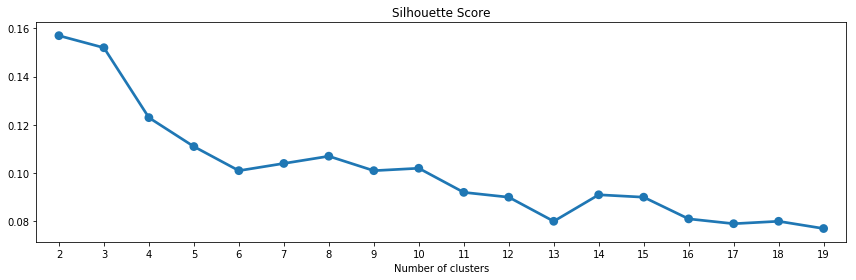

In [44]:
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clu = []
km_ss = []

start=2
end=20
# Create a for loop to find optimal n_clusters
for n_clusters in range(start,end):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X_norm1)

    silhouette_avg = round(silhouette_score(X_norm1, labels, random_state=1), 3)

    # Append score to lists
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

    # Plot graph at the end of loop
    if n_clusters == end - 1:
        plt.figure(figsize=(12,4))

        plt.title('Silhouette Score')
        plt.xlabel("Number of clusters")
        sns.pointplot(x=n_clu, y=km_ss)
        plt.tight_layout()
        plt.show()

## BIC score with a Gaussian Mixture Model

In [45]:


gm_bic= []
gm_score=[]
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_norm1)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_norm1)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_norm1)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_norm1))
    gm_score.append(gm.score(X_norm1))

BIC for number of cluster(s) 2: -48780.959657019004
Log-likelihood score for number of cluster(s) 2: 8.922306331975616
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -52681.746672085275
Log-likelihood score for number of cluster(s) 3: 10.078252431802673
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -53149.3335397574
Log-likelihood score for number of cluster(s) 4: 10.680277888294112
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -59533.819962528316
Log-likelihood score for number of cluster(s) 5: 12.236949933217112
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -60385.42009054258
Log-likelihood score for number of cluster(s) 6: 12.900932998669854


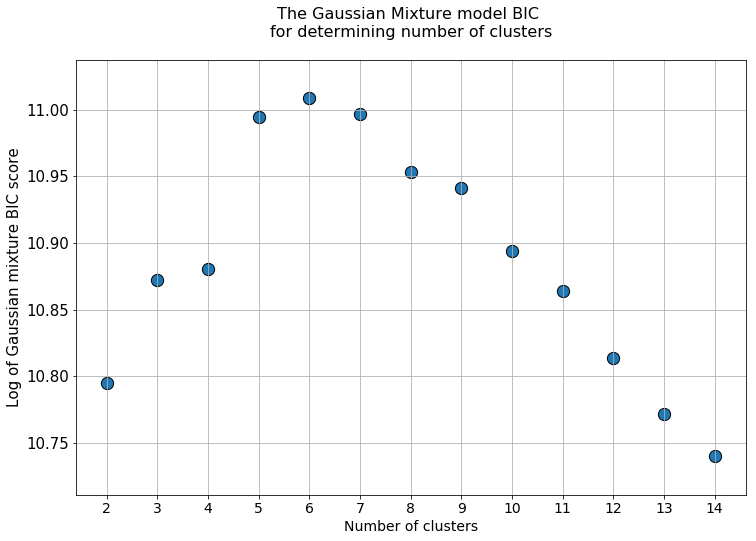

In [46]:
plt.figure(figsize=(12,8))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [5]:
new_data=pd.DataFrame(data=X_norm1,columns=data.columns.tolist())

In [48]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    score=davies_bouldin_score(data, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 0.269979336634942
Cluster 3 Davis Score 0.4239253867311062
Cluster 4 Davis Score 0.42464976883581995
Cluster 5 Davis Score 0.3166830003154979
Cluster 6 Davis Score 0.35945712354507814
Cluster 7 Davis Score 0.3967564930763278
Cluster 8 Davis Score 0.4062587582476789
Cluster 9 Davis Score 0.3978518972394338


In [7]:
model=  KMeans(
               n_clusters=3,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(new_data)
label=pd.DataFrame(model.labels_)

In [8]:
new_data['class']=label

In [9]:
new_data['class'].value_counts()

1    1087
2     979
0     884
Name: class, dtype: int64

In [10]:
new_data['class']

0       1
1       1
2       0
3       1
4       2
5       0
6       0
7       0
8       0
9       1
10      0
11      0
12      0
13      1
14      1
15      1
16      1
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      2
26      0
27      0
28      0
29      0
       ..
2920    1
2921    2
2922    2
2923    2
2924    2
2925    2
2926    2
2927    1
2928    1
2929    2
2930    2
2931    2
2932    2
2933    1
2934    2
2935    2
2936    1
2937    2
2938    2
2939    2
2940    1
2941    2
2942    2
2943    2
2944    2
2945    2
2946    2
2947    2
2948    2
2949    1
Name: class, Length: 2950, dtype: int32

C:\Users\ashay\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


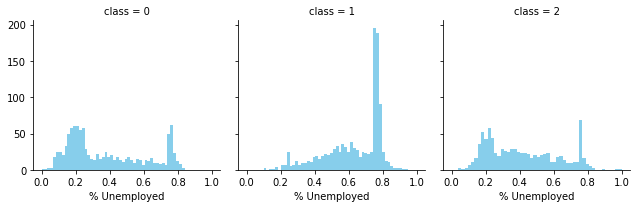

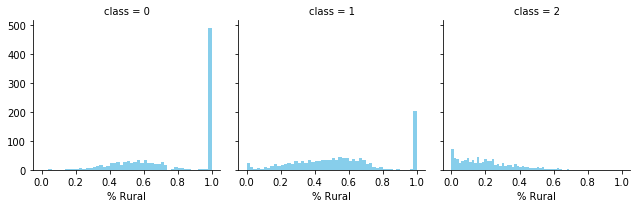

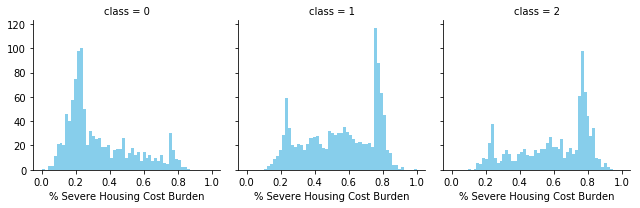

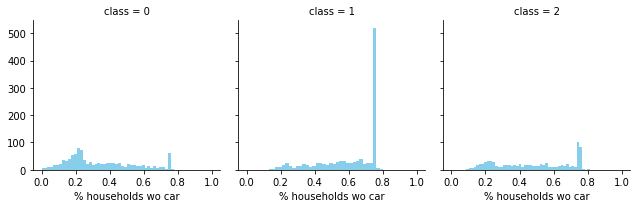

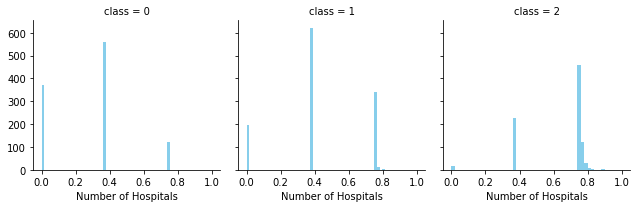

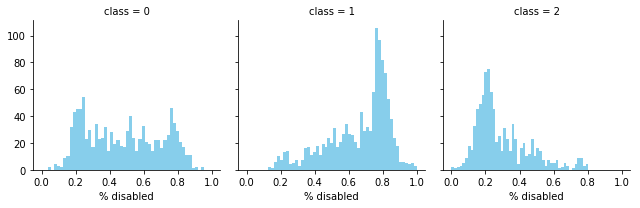

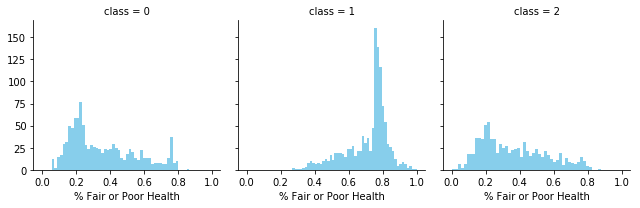

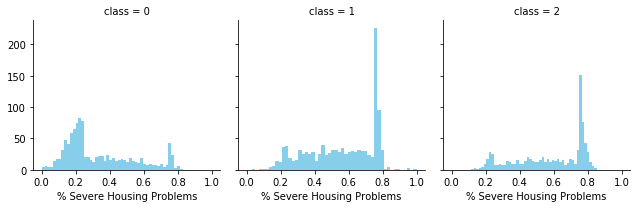

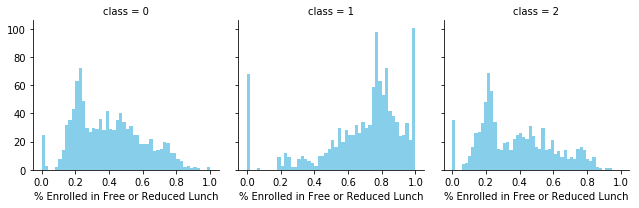

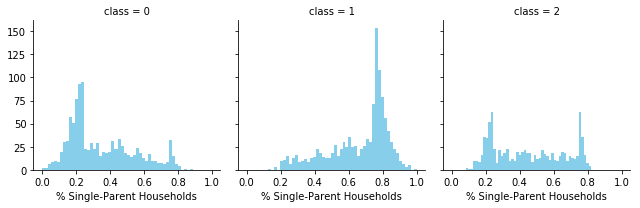

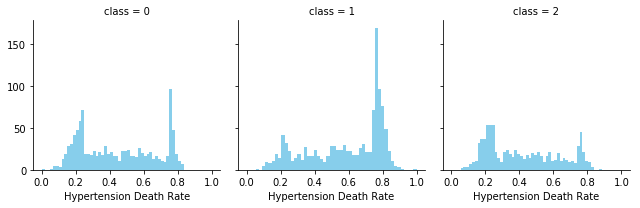

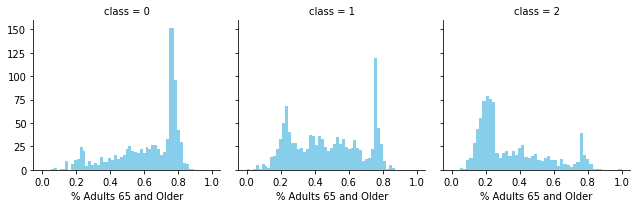

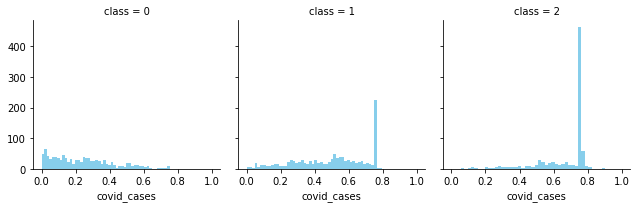

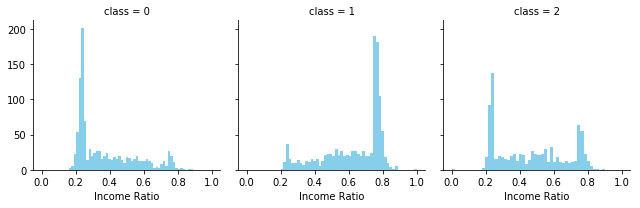

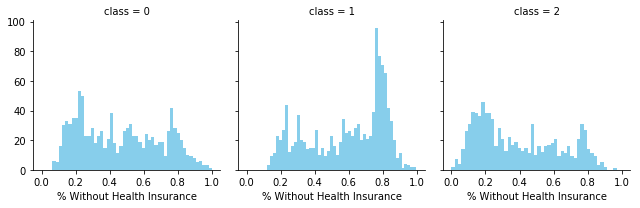

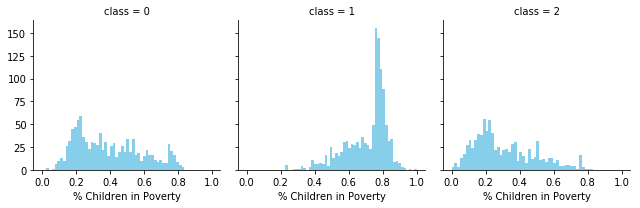

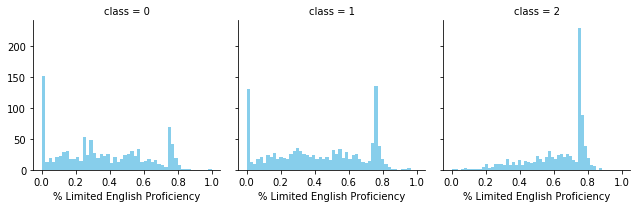

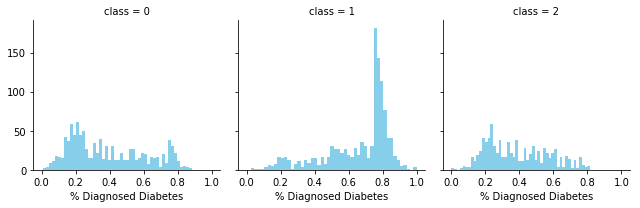

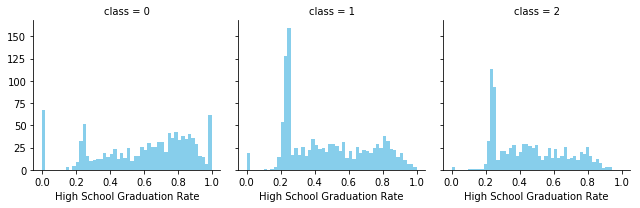

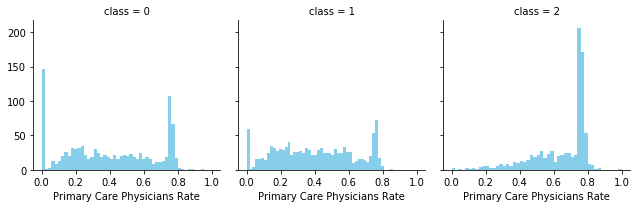

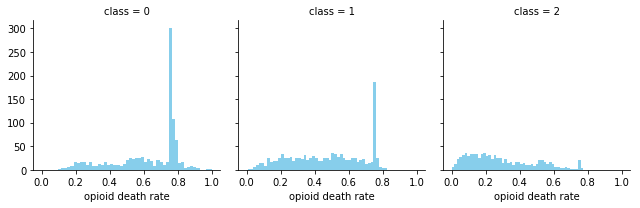

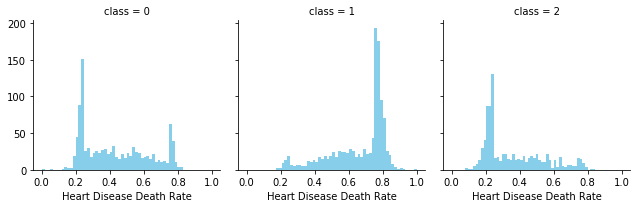

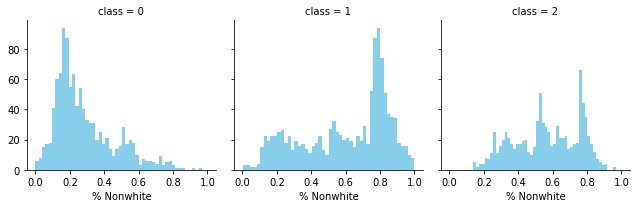

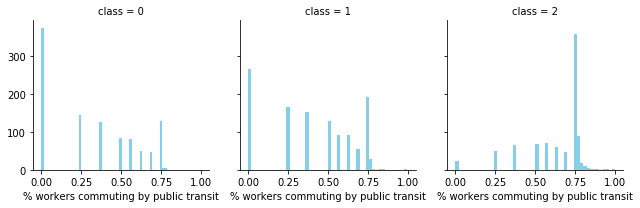

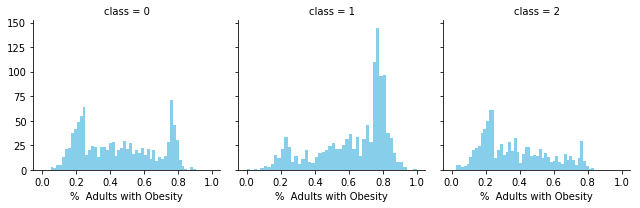

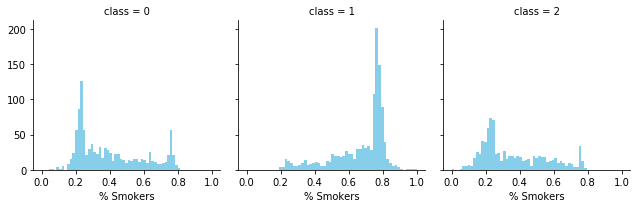

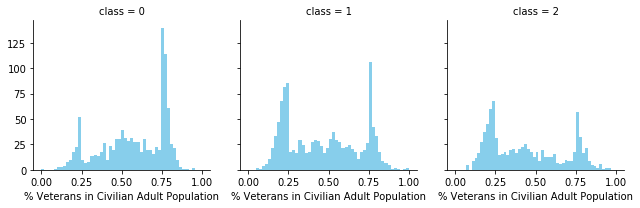

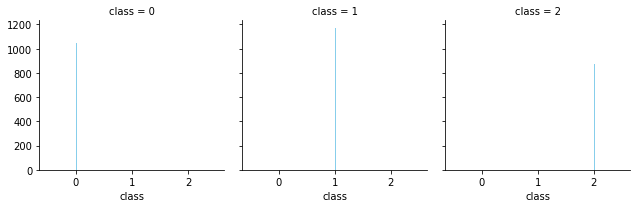

In [60]:
for features in new_data:
    grid= sns.FacetGrid(new_data, col='class')
    color='red' if features=="Deaths" else 'skyblue'
    grid.map(plt.hist, features,bins=50,color=color)

In [11]:
from sklearn.metrics import classification_report as clf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data[new_data.columns[:-1]],new_data['class'], test_size=0.33, random_state=42)

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
test_model=ExtraTreesClassifier()

test_model.fit(X_train,y_train)

y_pred = test_model.predict(X_test)
print(clf(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       276
           1       0.94      0.94      0.94       370
           2       0.97      0.97      0.97       328

    accuracy                           0.96       974
   macro avg       0.96      0.96      0.96       974
weighted avg       0.96      0.96      0.96       974



In [13]:
feature_importance = test_model.feature_importances_
  

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        test_model.estimators_],
                                        axis = 0)

Feature_score=(sorted(zip(feature_importance_normalized, X_train.columns), reverse=True))[:10]

top_ten_columns=[]
for val in Feature_score:
    top_ten_columns.append(val[1])

In [26]:
columns=top_ten_columns

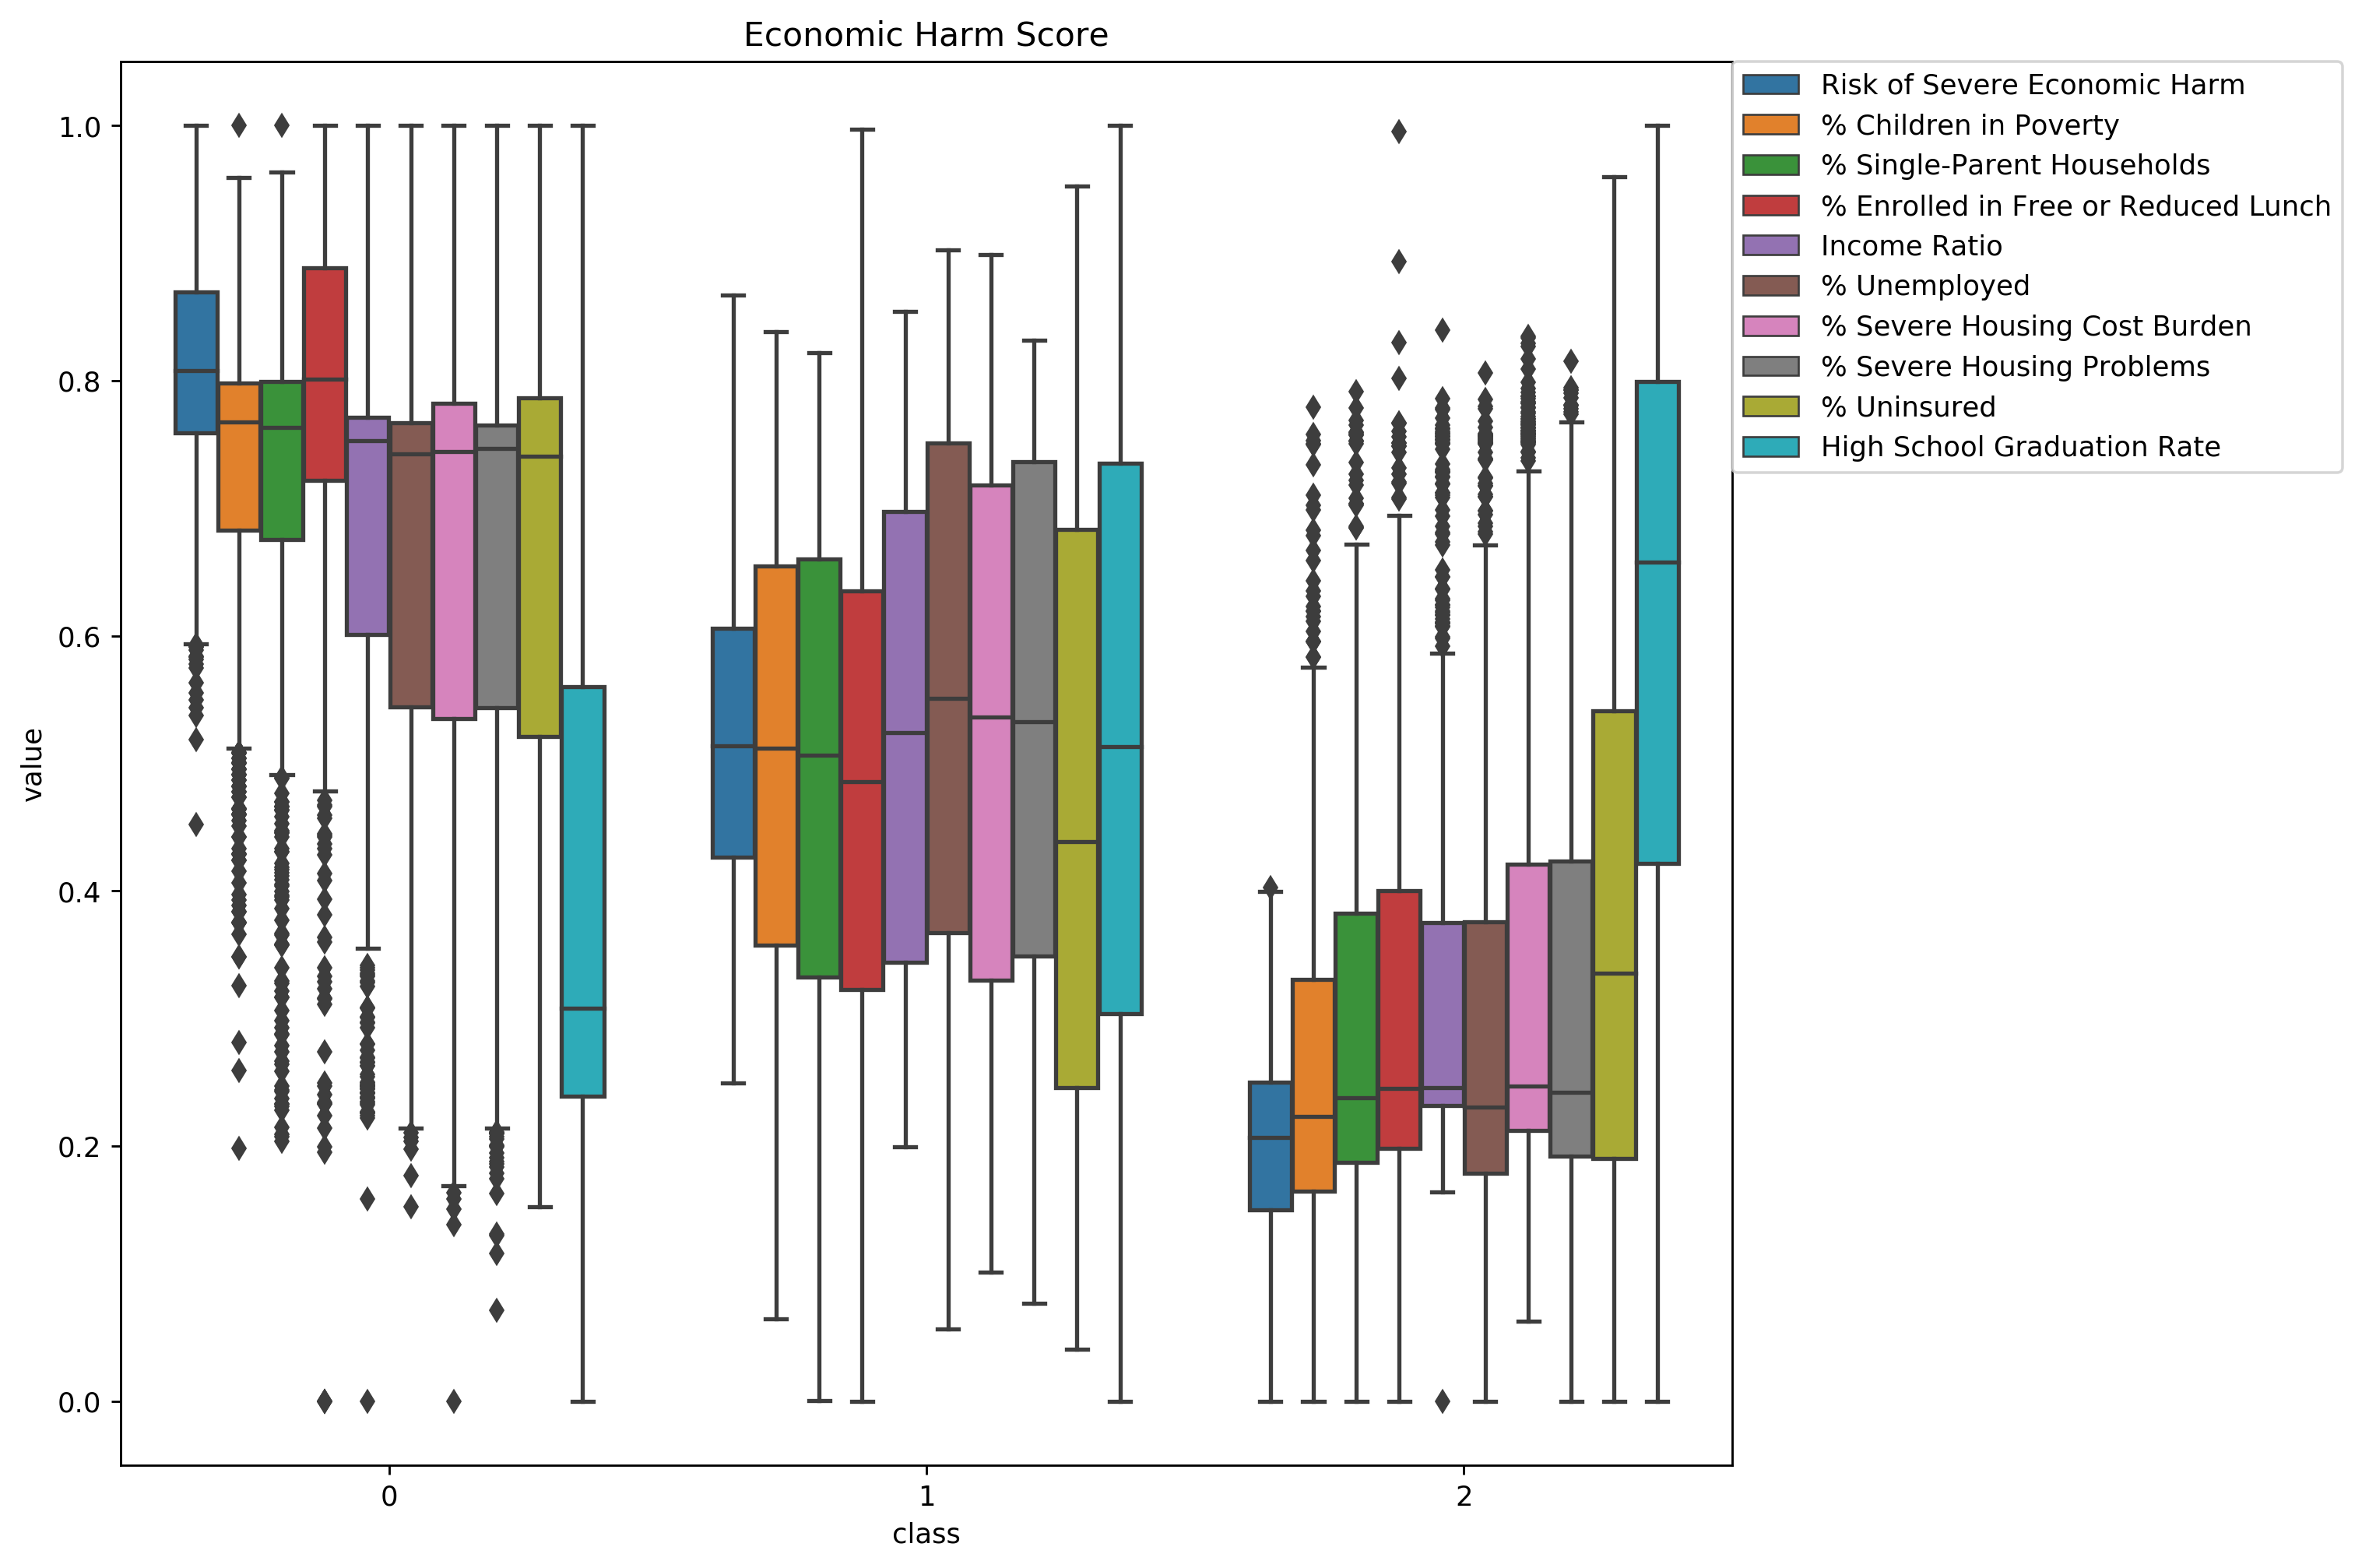

In [27]:
import seaborn as sns
import seaborn as sns


plt.figure(frameon=False,figsize=(12,8),dpi=255)
dd=pd.melt(new_data,id_vars=['class'],value_vars=columns,var_name='boxplot',)
sns.boxplot(x='class',y='value',data=dd,hue='boxplot',)
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0,)
plt.title("Economic Harm Score")
plt.tight_layout()

In [66]:
# from yellowbrick.cluster import SilhouetteVisualizer


# for i in range(2,6):
#     plt.figure(figsize=(6,10))
#     plt.title(str(i)+" Clusters")
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
#     visualizer.fit(X_train)


In [67]:
# from yellowbrick.features import manifold_embedding
# visualizer = manifold_embedding(X_test, y_test)

### Merging Score column and class

In [14]:
file['class']=new_data['class']

In [15]:
class_0=file[file['class']==0]
class_1=file[file['class']==1]
class_2=file[file['class']==2]

In [16]:
class_0.columns

Index(['Unnamed: 0', 'FIPS', 'State', 'County', 'Risk of Severe Economic Harm',
       '% Uninsured', '% Children in Poverty', 'Income Ratio',
       '% Single-Parent Households', '% Severe Housing Cost Burden',
       '% Severe Housing Problems', '% Enrolled in Free or Reduced Lunch',
       '% Unemployed', 'High School Graduation Rate', 'class'],
      dtype='object')

In [17]:
# State count in dataset

state_count=file['State'].value_counts().to_dict()


In [18]:
cluster1_states=class_0['State'].value_counts().to_dict()
cluster2_states=class_1['State'].value_counts().to_dict()
cluster3_states=class_2['State'].value_counts().to_dict()
    

for val in cluster1_states:
    cluster1_states[val]=cluster1_states.get(val)/state_count.get(val)*100
    cluster1_states=dict(sorted(cluster1_states.items(), key=lambda item: item[1],reverse=True))
for val in cluster2_states:
    cluster2_states[val]=cluster2_states.get(val)/state_count.get(val)*100
    cluster2_states=dict(sorted(cluster2_states.items(), key=lambda item: item[1],reverse=True))
for val in cluster3_states:
    cluster3_states[val]=cluster3_states.get(val)/state_count.get(val)*100
    cluster3_states=dict(sorted(cluster3_states.items(), key=lambda item: item[1],reverse=True))

#### Cluster 1

In [19]:
cluster1_states

{'Mississippi': 87.65432098765432,
 'South Carolina': 78.26086956521739,
 'New Mexico': 77.41935483870968,
 'Louisiana': 75.0,
 'Georgia': 73.58490566037736,
 'Arizona': 66.66666666666666,
 'Florida': 64.17910447761194,
 'Alabama': 62.68656716417911,
 'North Carolina': 55.00000000000001,
 'California': 53.44827586206896,
 'Oklahoma': 46.57534246575342,
 'Texas': 42.608695652173914,
 'Oregon': 38.23529411764706,
 'Kentucky': 33.33333333333333,
 'Virginia': 32.55813953488372,
 'Alaska': 31.25,
 'Maryland': 25.0,
 'Maine': 25.0,
 'Hawaii': 25.0,
 'New Jersey': 23.809523809523807,
 'Colorado': 21.666666666666668,
 'Nevada': 21.428571428571427,
 'Washington': 21.052631578947366,
 'Arkansas': 20.27027027027027,
 'Missouri': 20.0,
 'Montana': 20.0,
 'Rhode Island': 20.0,
 'New York': 19.35483870967742,
 'Michigan': 18.9873417721519,
 'South Dakota': 14.285714285714285,
 'Illinois': 14.000000000000002,
 'Ohio': 12.5,
 'West Virginia': 11.320754716981133,
 'Pennsylvania': 7.462686567164178,
 'N

<BarContainer object of 44 artists>

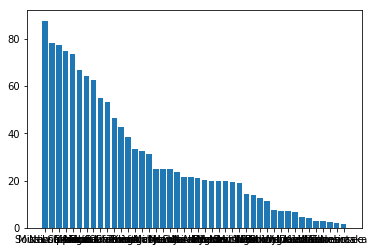

In [20]:
keys = cluster1_states.keys()
values = cluster1_states.values()

plt.bar(keys, values)

#### Cluster 2

In [21]:
cluster2_states

{'Delaware': 100.0,
 'District of Columbia': 100.0,
 'West Virginia': 83.01886792452831,
 'Washington': 73.68421052631578,
 'Tennessee': 71.57894736842105,
 'Massachusetts': 71.42857142857143,
 'Arkansas': 67.56756756756756,
 'New York': 64.51612903225806,
 'Pennsylvania': 62.68656716417911,
 'Alaska': 62.5,
 'Connecticut': 62.5,
 'Michigan': 59.49367088607595,
 'Idaho': 58.82352941176471,
 'Vermont': 57.14285714285714,
 'Kentucky': 56.41025641025641,
 'Maine': 56.25,
 'Oregon': 55.88235294117647,
 'Hawaii': 50.0,
 'New Jersey': 47.61904761904761,
 'Ohio': 46.590909090909086,
 'Illinois': 42.0,
 'Missouri': 40.95238095238095,
 'Montana': 40.0,
 'Rhode Island': 40.0,
 'Texas': 38.69565217391304,
 'California': 37.93103448275862,
 'Maryland': 37.5,
 'North Carolina': 37.0,
 'Nevada': 35.714285714285715,
 'Colorado': 31.666666666666664,
 'New Hampshire': 30.0,
 'Alabama': 29.850746268656714,
 'Oklahoma': 28.767123287671232,
 'Virginia': 28.68217054263566,
 'Florida': 28.35820895522388,
 '

<BarContainer object of 51 artists>

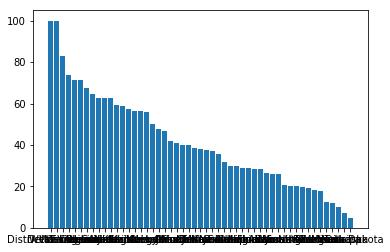

In [22]:
keys = cluster2_states.keys()
values = cluster2_states.values()

plt.bar(keys, values)

#### Cluster 3

In [23]:
cluster3_states

{'Nebraska': 91.42857142857143,
 'North Dakota': 88.09523809523809,
 'Iowa': 87.87878787878788,
 'Minnesota': 79.76190476190477,
 'Wisconsin': 76.38888888888889,
 'Utah': 76.0,
 'Wyoming': 73.91304347826086,
 'South Dakota': 73.46938775510205,
 'New Hampshire': 70.0,
 'Kansas': 69.31818181818183,
 'Indiana': 65.21739130434783,
 'Colorado': 46.666666666666664,
 'Illinois': 44.0,
 'Nevada': 42.857142857142854,
 'Ohio': 40.909090909090914,
 'Montana': 40.0,
 'Rhode Island': 40.0,
 'Missouri': 39.04761904761905,
 'Virginia': 38.759689922480625,
 'Idaho': 38.23529411764706,
 'Maryland': 37.5,
 'Connecticut': 37.5,
 'Vermont': 35.714285714285715,
 'Pennsylvania': 29.850746268656714,
 'New Jersey': 28.57142857142857,
 'Massachusetts': 28.57142857142857,
 'Tennessee': 26.31578947368421,
 'Hawaii': 25.0,
 'Oklahoma': 24.65753424657534,
 'Michigan': 21.518987341772153,
 'Maine': 18.75,
 'Texas': 18.695652173913043,
 'New York': 16.129032258064516,
 'Arkansas': 12.162162162162163,
 'Kentucky': 10

<BarContainer object of 49 artists>

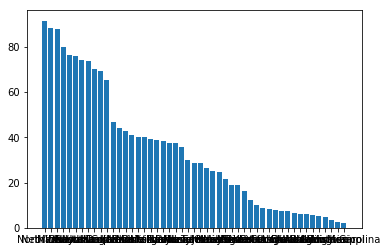

In [24]:
keys = cluster3_states.keys()
values = cluster3_states.values()

plt.bar(keys, values)

## Intercluster Distance Maps
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership,<br><br> e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

## PCA Plot

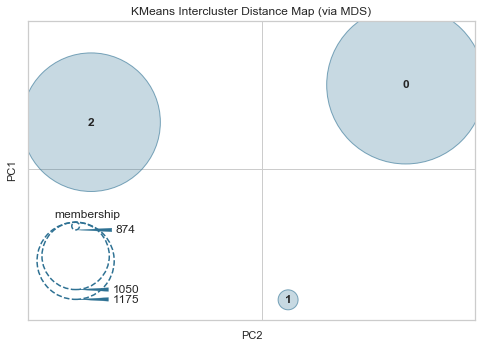

In [82]:
from yellowbrick.cluster import intercluster_distance



visualizer = intercluster_distance(
                KMeans(
               n_clusters=3,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42),
               X_norm1)

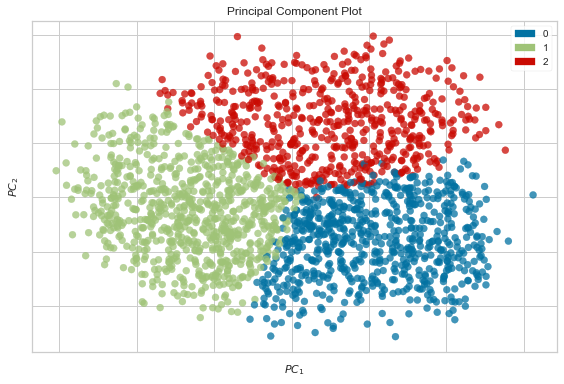

In [83]:
from yellowbrick.features import pca_decomposition
visualizer = pca_decomposition(X_train,y_train)

In [84]:
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [58]:
slc =  {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_norm1)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#     db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X_norm1,clusters)

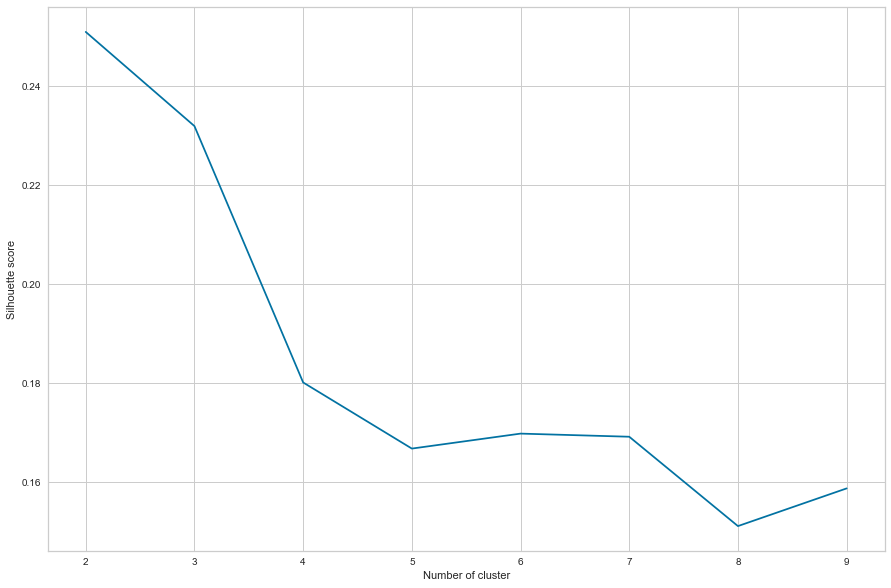

In [59]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2509884980346135
For n_clusters = 3 The average silhouette_score is : 0.23196706063616326
For n_clusters = 4 The average silhouette_score is : 0.18018667806604835
For n_clusters = 5 The average silhouette_score is : 0.16683571690128027
For n_clusters = 6 The average silhouette_score is : 0.16985913612916653
For n_clusters = 7 The average silhouette_score is : 0.1692275601676119
For n_clusters = 8 The average silhouette_score is : 0.1511805327439586
For n_clusters = 9 The average silhouette_score is : 0.1587938196174912


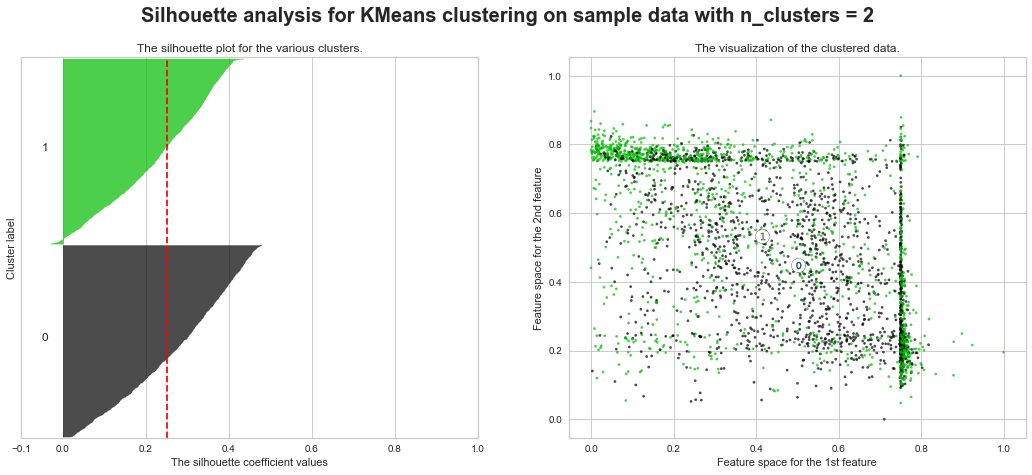

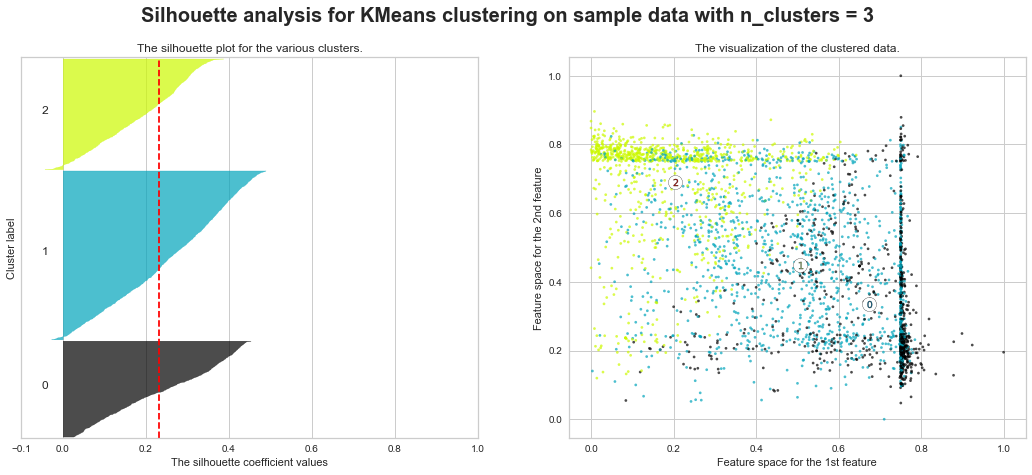

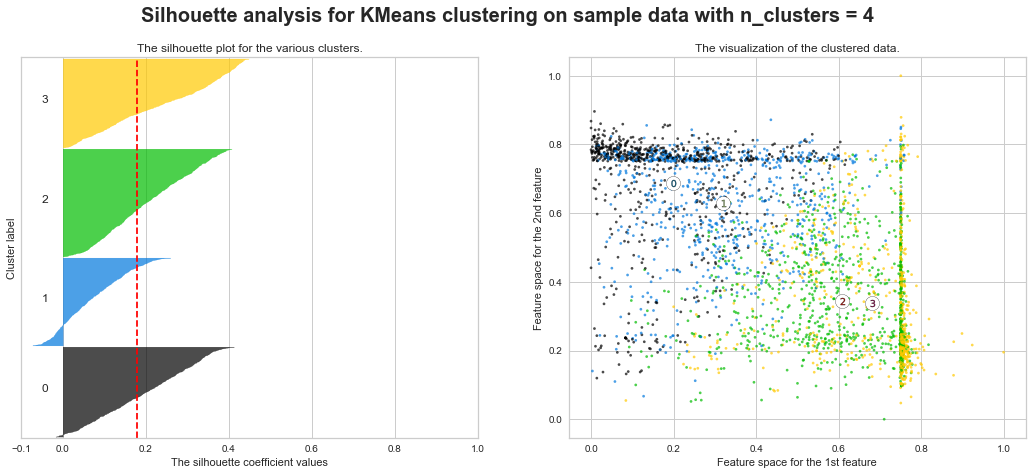

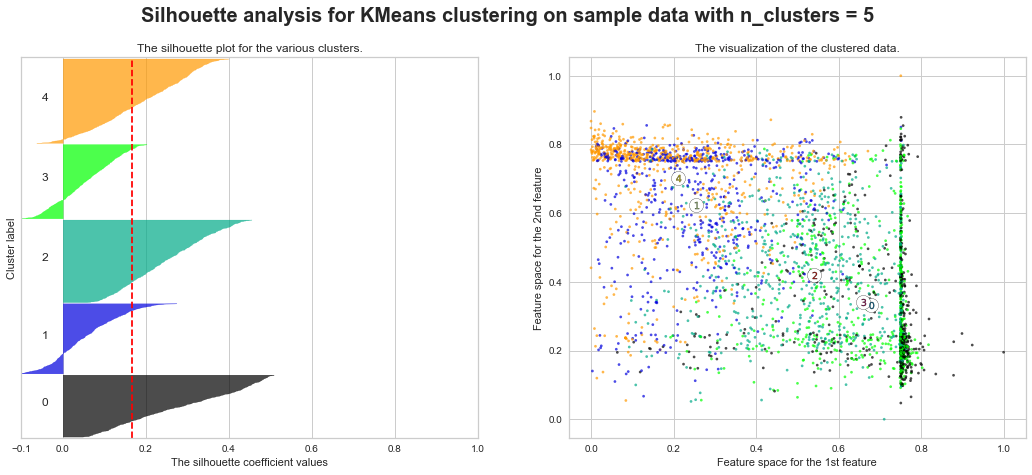

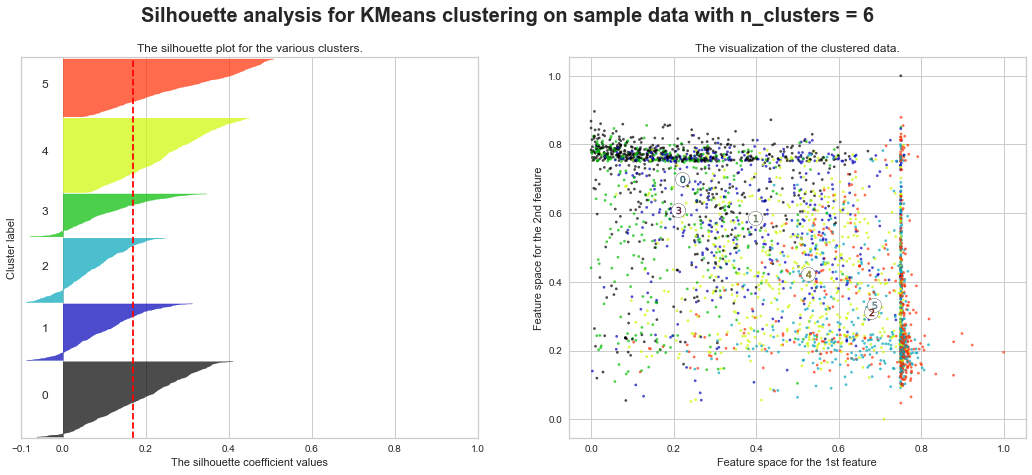

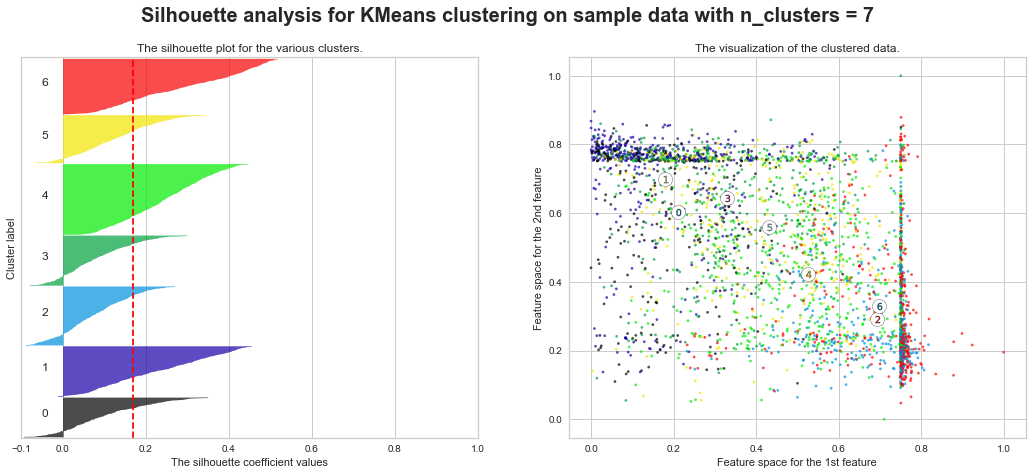

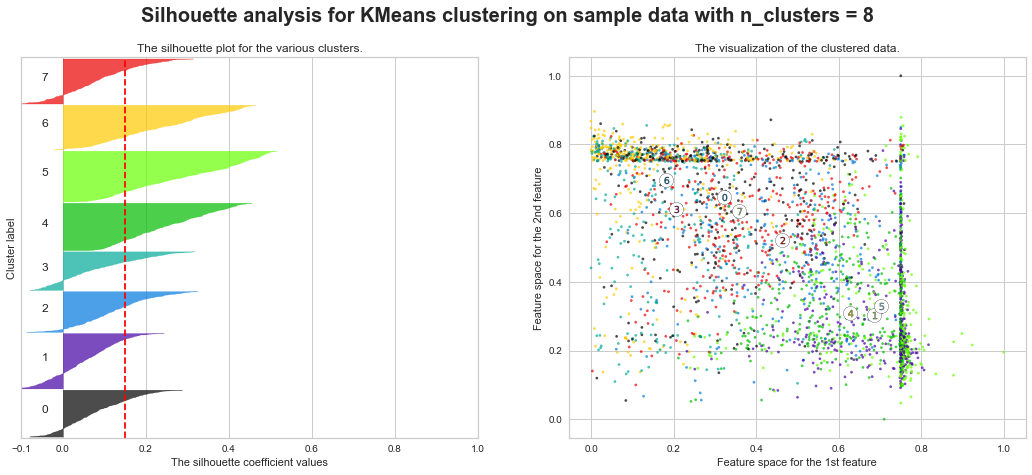

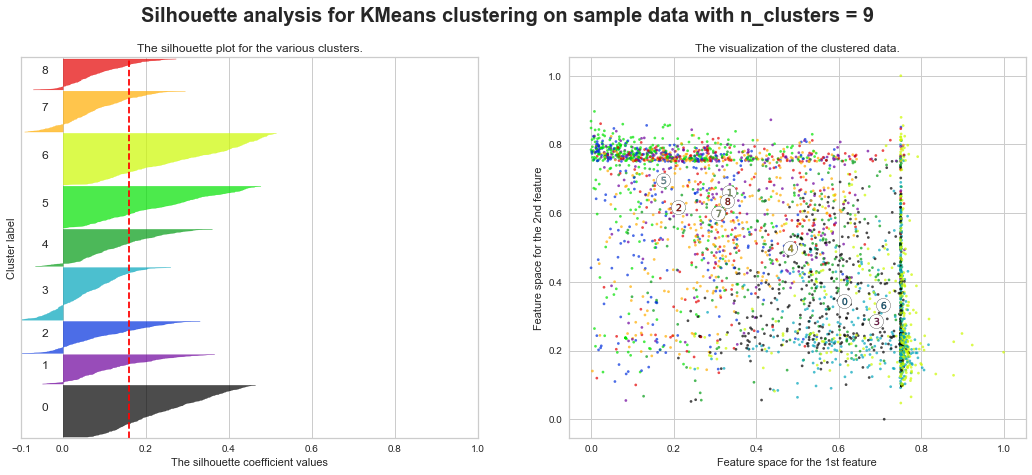

In [60]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_norm1) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X_norm1)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm1, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_norm1[:, 0], X_norm1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=20, fontweight='bold')

plt.show()